Number of images with age > 12: 20295
Number of images with age <= 12: 3413


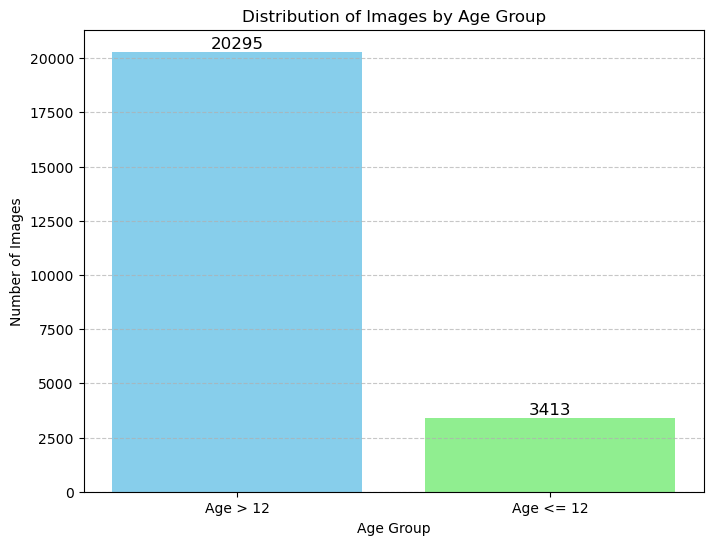

In [1]:
import os
import matplotlib.pyplot as plt

# 1. Setup: Define the path to the directory containing the images.
IMAGE_DIR = '/data2/masino_lab/abamini/Face2pheno/utkface'

# 2. Analysis: Initialize counters and process the files.
over_12 = 0
under_or_equal_12 = 0
corrupted_files = 0

# Check if the directory exists before proceeding.
if not os.path.isdir(IMAGE_DIR):
    print(f"Error: Directory not found at {IMAGE_DIR}")
else:
    # Loop through each file in the directory.
    for filename in os.listdir(IMAGE_DIR):
        try:
            # The age is the first part of the filename, separated by '_'.
            age = int(filename.split('_')[0])
            if age > 12:
                over_12 += 1
            else:
                under_or_equal_12 += 1
        except (ValueError, IndexError):
            # Handle cases where the filename does not match the expected format.
            corrupted_files += 1
            print(f"Warning: Corrupted filename found and skipped: {filename}")

    # Print the final counts after processing all files.
    print(f"Number of images with age > 12: {over_12}")
    print(f"Number of images with age <= 12: {under_or_equal_12}")
    if corrupted_files > 0:
        print(f"Number of corrupted files skipped: {corrupted_files}")

    # 3. Plotting: Visualize the results.
    age_groups = ['Age > 12', 'Age <= 12']
    counts = [over_12, under_or_equal_12]

    # Create the bar chart.
    plt.figure(figsize=(8, 6))
    plt.bar(age_groups, counts, color=['skyblue', 'lightgreen'])

    # Add titles and labels for clarity.
    plt.xlabel('Age Group')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images by Age Group')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add text labels on top of the bars for exact counts.
    for i, count in enumerate(counts):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

    # In a script, you would save the figure or show it.
    # To save the plot to a file, uncomment the following line:
    # plt.savefig('age_distribution.png')
    
    # To display the plot in an interactive window, uncomment the following line:
    plt.show()